<a href="https://colab.research.google.com/github/Dhruvin3103/ML/blob/main/California_housing_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
!matplotlib inline

/bin/bash: matplotlib: command not found


In [82]:
# !pip install sklearn
# from sklearn.datasets import load_boston

# lb = load_boston()
# X = lb.data
# print(X)
# Y = lb.target
# df = pd.DataFrame(X,columns = lb.feature_names)

In [83]:
from sklearn.datasets import fetch_california_housing
h = fetch_california_housing() 
df = pd.DataFrame(h.data,columns=h.feature_names)
df["price"] = h.target
print(h.DESCR)
print(df.head(5))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [84]:
print(df.describe())
print(df.tail(2))

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

<ipython-input-85-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

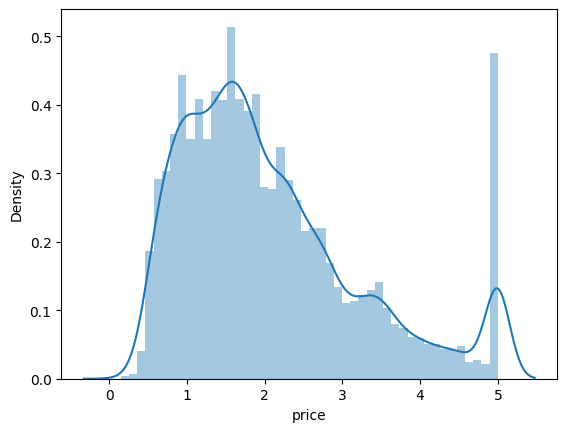

In [85]:
sns.distplot(df['price'])

<Axes: >

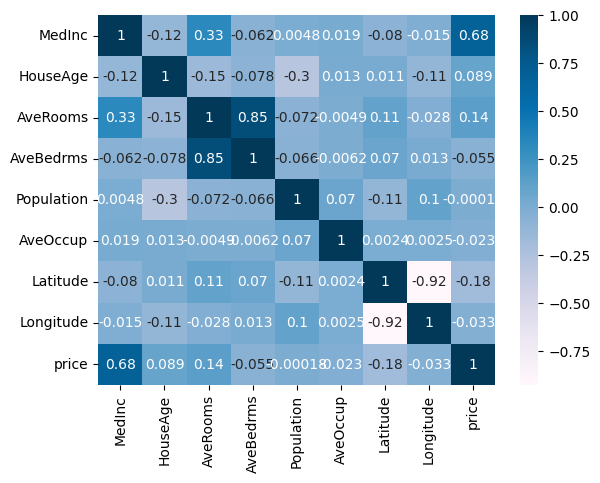

In [86]:
# plt.figure(figsize=(10,10))
df['price'] = np.log1p(df['price'])
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
# plt.show()


In [87]:
cor_tar = abs(cor['price'])
print(cor_tar)
rel_feat = cor_tar[cor_tar>0.1]
print(rel_feat)
print([i for i,v in rel_feat.iteritems()])

MedInc        0.676439
HouseAge      0.088588
AveRooms      0.139036
AveBedrms     0.055263
Population    0.000176
AveOccup      0.023449
Latitude      0.175914
Longitude     0.033463
price         1.000000
Name: price, dtype: float64
MedInc      0.676439
AveRooms    0.139036
Latitude    0.175914
price       1.000000
Name: price, dtype: float64
['MedInc', 'AveRooms', 'Latitude', 'price']


In [88]:
from sklearn.model_selection import train_test_split
Y = df['price']
X = df.drop('price',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)

(16512, 8)


In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
print(pred,Y_test)


[0.62758336 0.98132443 1.23802756 ... 1.78598635 0.75971522 1.05309898] 20046    0.390013
3024     0.377066
15663    1.791761
20484    1.158766
9814     1.329724
           ...   
15362    1.290059
16623    1.299647
18086    1.791761
2144     0.544067
3665     0.922273
Name: price, Length: 4128, dtype: float64


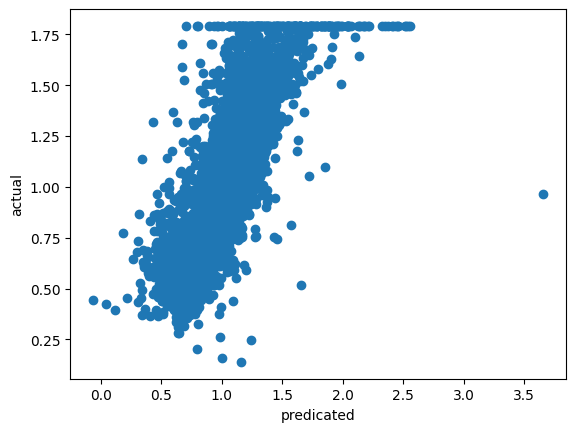

In [90]:
plt.scatter(pred,Y_test)
plt.xlabel("predicated")
plt.ylabel("actual")
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
print("R squared value is : "+str(r2_score(Y_test,pred)))
print("means square value is : "+str( mean_squared_error(Y_test,pred)))

R squared value is : 0.600615972280346
means square value is : 0.050340111728720265
